In [1]:

import sys
### general purpose
import os
import numpy as np
import xarray as xr
import pandas as pd
### palette
import matplotlib.cm as mplcm
import matplotlib.ticker as mticker
#import matplotlib.cm as cm
#div_cmap = mplcm.seismic
import cmocean
from cmocean import cm
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy.io as sio
from pylab import *
from netCDF4 import Dataset


sys.path.insert(0,'/home/barboty/Téléchargements/mes notebooks')

import Fonctions_detection as fd

%matplotlib inline


/home/barboty/anaconda2/lib/python2.7/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [74]:
Position = fd.Tracking('12',50, '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-MJM155-S/1d/2007/NATL60LAB-MJM155_y2007m', [300, 440, 315, 390])

In [4]:
#choix du fichier à analyser

def choix_fichier(path, jour, mois, PosCentre, donnee):
    x_centre = PosCentre[jour-1][0]
    y_centre = PosCentre[jour-1][1]
    
    j = str(jour)
    m = str(mois)
    
    if donnee == 'U':
        file = path+m+'d'+j+'.1d_gridU.nc' 
    elif donnee == 'V':
        file = path+m+'d'+j+'.1d_gridV.nc'  #m12d30.1d_gridU.nc 
    elif donnee == T or donnee == S:
        file = path+m+'d'+j+'.1d_gridT.nc'  #m12d30.1d_gridU.nc 
    elif donnee == D:    
        file = 'rien'
    return (file,x_centre,y_centre)

In [3]:
# Récupération des données utiles
Info = choix_fichier('/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-MJM155-S/1d/2007/NATL60LAB-MJM155_y2007m',30, 12 , Position, 'U')

# Création de l'axe X
def Abscisses(intervalle, donnee):
    x = [0]*((intervalle*2)+1)
    x[intervalle] = donnee[1]
    for i in range (intervalle):
        x[intervalle-(i+1)] = donnee[1] - (i+1)
        x[intervalle+(i+1)] = donnee[1] + (i+1)
    return x

# Création du tableau des données à afficher
def TableauZ(type, file):
    g = Dataset(file, "r", format="NETCDF4")
    if (type == 'U'):
        zz=g.variables['vozocrtx'][0,:,Info[2],Info[1]-50:Info[1]+51]
    elif (type == 'V'):
        zz=g.variables['vomecrty'][0,:,Info[2],Info[1]-50:Info[1]+51]
    elif (type == 'T'):
        zz=g.variables['votemper'][0,:,Info[2],Info[1]-50:Info[1]+51]
    elif (type == 'S'):
        zz=g.variables['vosaline'][0,:,Info[2],Info[1]-50:Info[1]+51]
    elif (type == 'D'):
        zz = []
    
    return zz

# Il faudrait créer le fichier des profondeurs avec le Dataset.


NameError: name 'Position' is not defined

In [77]:
# Liste des niveaux de profondeur - cellule/cellule
Prof = '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-I/NATL60LAB_v4.1_cdf_mesh_zgr.nc'

f = Dataset(Prof, "r", format = "NETCDF4")
q = [0]*300
i=0

for i in range(300):
    
    q[i] = f.variables['e3t'][0,i,150,150]
    
len(q)
Q = np.array(q)

In [78]:
# Création des niveaux de profondeur - Avec les niveaux cellule/cellule

Depth = [0]*300
i=0
for i in range(300):
    if (i == 0):
        Depth[0] = Q[0]
    else:
        Depth[i] = Depth[i-1]+Q[i]





AttributeError: 'module' object has no attribute 'reverse'

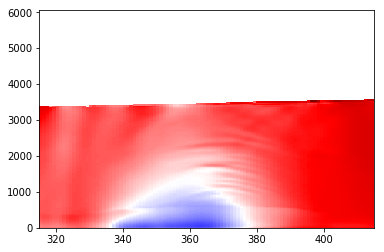

In [82]:
# Tracé du profil


Z = TableauZ('U', Info[0])

pcolor(X, Depth, zz,cmap='seismic',vmin=-0.125,vmax=0.125)

plt.colorbar()
show()
